https://drive.google.com/drive/folders/1AXTNAh9edJojGRcb3L8UFaZplwUsz3mV

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
import regex as re
from matplotlib import ticker, cm

from Bio import SeqIO, SeqUtils
from Bio.SeqUtils import GC

# Распределение GC 

In [2]:
def filter_fastq(filename): 
    
    sequnce_data = SeqIO.parse(filename, 'fastq')
    
    filter_reads = []
    
    for record in sequnce_data:
        #отфильтруем риды с некачественными нуклеотидами  с порогом 30 
        if  np.min(record.letter_annotations['phred_quality']) >= 30:
            filter_reads.append(record)
                               
    SeqIO.write(filter_reads, 'filtered_reads.fastq', 'fastq')

In [3]:
filter_fastq("1/100x.1.fastq")

Text(0, 0.5, 'Number of reads ')

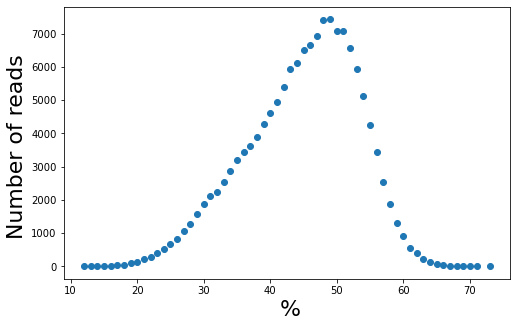

In [10]:
filtered_data = SeqIO.parse('filtered_reads.fastq', 'fastq')

gc_distribution = {}

for record in filtered_data:
    count = SeqUtils.GC(record.seq) #ВРоде это можно использовать 
    if count not in gc_distribution.keys():
        gc_distribution.update({count : 1})
    else:
        gc_distribution[count] += 1

        
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

plt.scatter(gc_distribution.keys(), gc_distribution.values() )

plt.xlabel(r' $ \% $', fontsize = 22)
plt.ylabel(r"Number of reads ", fontsize=22)


У меня не такое симметричное распределение, как в FastQc.
Думаю, это вызвано тем, что я так профильтровала данные 

#  По FASTQ файлу построить распределение вероятности ошибки в зависимости от позиции нуклеотида. 

In [22]:
filtered_data = SeqIO.parse('filtered_reads.fastq', 'fastq')


#Это такой способ получить размерности
m  = 0 
for record in filtered_data:
    n = len(record.seq)
    m = m + 1
    
#error_distr = np.zeros( (len (SeqIO.to_dict(filtered_data ) ), n))
error_distr = np.zeros( ( m , n))
 
#?
filtered_data = SeqIO.parse('filtered_reads.fastq', 'fastq')
i = 0
for record in filtered_data: 
    error_distr[i, :] = np.power(10, -np.array(record.letter_annotations['phred_quality'])/10)
    i = i + 1
 
 

In [24]:
np.sum(error_distr>0)

14686600

<AxesSubplot:>

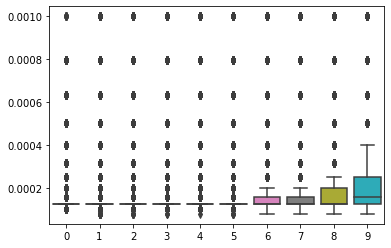

In [32]:

import seaborn as sns

sns.boxplot(data = pd.DataFrame(error_distr[:, ::10]) ) 

In [ ]:
По оси ОХ расположены номер позиции/10  (Так получилось).


График кажется похожим на результат FastQc, но сравнивать разную графику сложновато 